In [193]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [194]:
import pandas as pd
import math as mt

from IPython.display import clear_output
from src import spotify, dp, utils, DB

db = DB()

## 사용자 메일 박스 조회

In [195]:
mail_box_id = "6239a095db6ce67c4c52511c"

tracks = db.get_mail_box(mail_box_id)
tracks.head()

,id,name,artists,artists_name
0,2FWquqPNxte8iqZ3ATQG0p,All I Wanna Do (K) (Feat. Hoody & Loco),4XDi67ZENZcbfKnvMnTYsI,Jay Park
1,2SMq0lOqCTHayWa9juoI0d,We Are,5a8EJtOEbUJDF4RX3mKK02,Woo
2,5xrtzzzikpG3BLbo4q1Yul,LILAC,3HqSLMAZ3g3d5poNaI7GOU,IU
3,4LxFRsy3TZjqAtAgIsjkez,"Rainy day (Feat. ASH ISLAND, Skinny Brown)",0J372uvAXbRjLFSoAVE2lp,PATEKO
4,79r5vi5H3sYvnRNpkNylXP,Numbers (feat. CHANGMO),2YXlVLKq3X3soXd2aXUtIT,JAMIE


## 사용자에게 추천된 음악 확인

In [196]:
reco_tracks = db.get_mail(mail_box_id)
reco_tracks.head()

,id,name,artists,artists_name
0,1rqqCSm0Qe4I9rUvWncaom,High Hopes,20JZFwl6HVl6yg8a4H3ZqK,Panic! At The Disco
1,6rrTr2HEAzlpC4KWZxF3S1,Woman Like Me (feat. Nicki Minaj),"3e7awlrlDSwF3iM0WBjGMp,0hCNtLu0JehylgoiP8L4Gh","Little Mix,Nicki Minaj"
2,2X7082NWHy3ILSMXz2eDlY,Pompeii,6dC0rIJNLSFZwqckLgXJ8p,Timeflies
3,6FuGJB290AQMAHTfjOYVaK,"Mood (Remix) feat. Justin Bieber, J Balvin & i...","6fWVd57NKTalqvmjRd2t8Z,1uNFoZAHBGtllmzznpCI3s,...","24kGoldn,Justin Bieber,J Balvin"
4,3Vo4wInECJQuz9BIBMOu8i,Finesse - Remix; feat. Cardi B,"0du5cEVh5yTK9QJze8zA0C,4kYSro6naA4h99UJvo89HB","Bruno Mars,Cardi B"


## 사용자가 맘에 들었던 음악 Select (Random 하게)

In [197]:
sel_tracks = reco_tracks.sample(n=mt.floor(len(reco_tracks) * 0.075))
db.new_mail_box_seed(mail_box_id, sel_tracks)

sel_tracks.head()

,id,name,artists,artists_name
40,6UmRhJatcth1KF76r5ucvZ,1 of 1,2hRQKC0gqlZGPrmUKbcchR,SHINee
31,7Cz1Ny3XhRz6KBT0YHVHyf,COOL,5LWkv2hDbDwZL3zNwZYNPx,Weki Meki
97,03VNgdCL9t8aPyvwZecglI,More Than Friends (feat. Meghan Trainor),4phGZZrJZRo4ElhRtViYdl,Jason Mraz
72,1fQrmSaN8EOxbZQrFcihQZ,Moonset,"4RfI1z9u2xIc5Qnqac4JbO,62i8ukH7NagOk7lZE6B3xA","YUKIKA,Kim Mi Jeong"
78,7KQQmtHVMa3u88JLCSmFsl,How are you (feat.Harim),5VxfguafjfSdJcN10ACVZe,Geeks


## 재추천

In [198]:
# 1. Get Token
token = spotify.get_token()

genres = spotify.get_genres(token, sel_tracks)

og_features = spotify.get_features(token, tracks)
reply_features = spotify.get_features(token, sel_tracks)
db.observe_seed_zone(reply_features)

In [199]:
recos = spotify.get_recommend(sel_tracks,reply_features, genres, token,
                             og=tracks)
reco_features = spotify.get_features(token, recos)
reco_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,3Vo4wInECJQuz9BIBMOu8i,0.704,0.859,5,-4.877,0.0996,0.01850,0.0,0.0215,0.926,105.115
1,22fkACoSaO4drFbiTtxolG,0.612,0.887,5,-3.658,0.0465,0.05010,0.0,0.0708,0.619,107.999
2,7Mn9begcwfZ7utquTWUmjV,0.710,0.897,5,-3.570,0.0417,0.07600,0.0,0.2170,0.615,114.982
3,4QeoDcR16IHpmmgFGQDrCp,0.720,0.727,5,-3.882,0.0489,0.05560,0.0,0.1380,0.481,99.994
4,2igbKtoBMXdYgYPkCpl0V4,0.655,0.693,5,-5.148,0.0372,0.00166,0.0,0.0398,0.868,102.028


In [200]:
# 합치기
sel_tracks = pd.concat([tracks,sel_tracks], ignore_index=True)
features = pd.concat([og_features, reply_features], ignore_index=True)

features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2FWquqPNxte8iqZ3ATQG0p,0.403,0.724,8,-6.064,0.2460,0.3770,0.000000,0.0927,0.428,97.133
1,2SMq0lOqCTHayWa9juoI0d,0.756,0.808,7,-3.272,0.0752,0.1470,0.000000,0.1290,0.685,100.018
2,5xrtzzzikpG3BLbo4q1Yul,0.738,0.890,2,-2.275,0.0748,0.0895,0.000002,0.2130,0.750,114.942
3,4LxFRsy3TZjqAtAgIsjkez,0.621,0.783,2,-4.780,0.1620,0.5500,0.000000,0.1090,0.490,160.161
4,79r5vi5H3sYvnRNpkNylXP,0.844,0.809,7,-3.028,0.1090,0.0763,0.000004,0.1220,0.571,88.561


In [201]:
norm_features = dp.make_norm(features, reco_features)

norm_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2FWquqPNxte8iqZ3ATQG0p,0.223704,0.693587,0.727273,0.485850,0.462568,0.416997,0.000000,0.105618,0.381018,0.266811
1,2SMq0lOqCTHayWa9juoI0d,0.746667,0.793349,0.636364,0.736681,0.105395,0.162555,0.000000,0.152718,0.675608,0.289657
2,5xrtzzzikpG3BLbo4q1Yul,0.720000,0.890736,0.181818,0.826251,0.104559,0.098944,0.000007,0.261710,0.750115,0.407835
3,4LxFRsy3TZjqAtAgIsjkez,0.546667,0.763658,0.181818,0.601204,0.286909,0.608381,0.000000,0.126768,0.452086,0.765909
4,79r5vi5H3sYvnRNpkNylXP,0.877037,0.794537,0.636364,0.758602,0.176077,0.084342,0.000014,0.143636,0.544934,0.198933


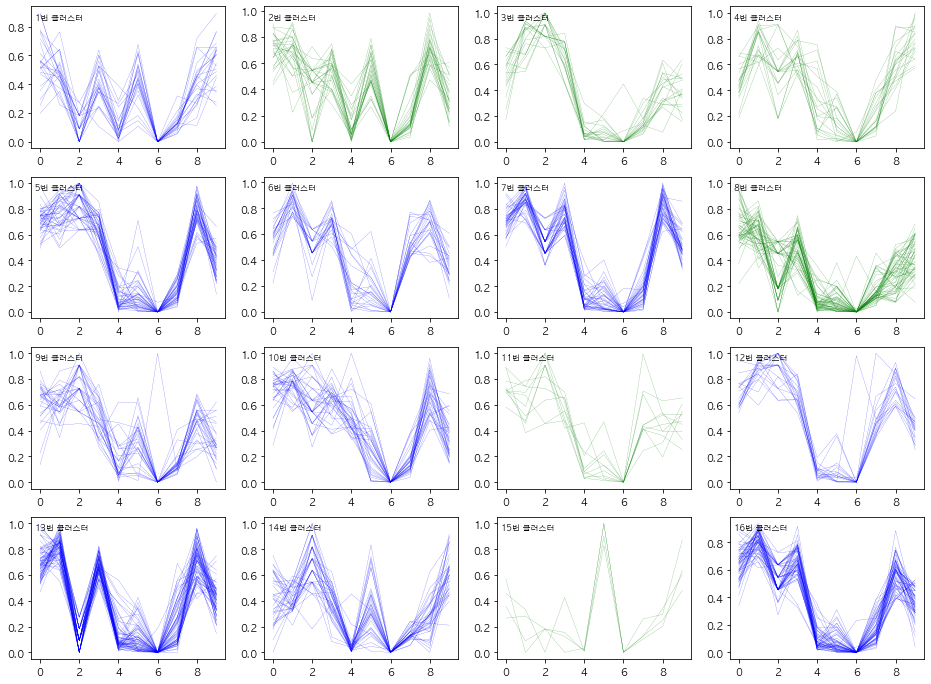

In [202]:
kmeans = utils.KMeans(
    datas=norm_features
)
kmeans.run(early_stop_cnt=5)
clear_output(wait=True)

utils.visual_cluster_data(sel_tracks, kmeans)
_filtering_music_list = dp.music_filtering(sel_tracks, kmeans)

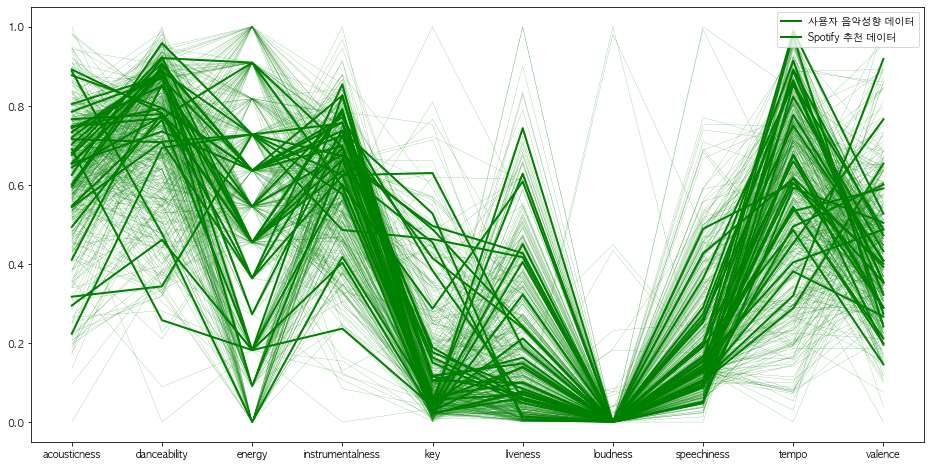

In [203]:
utils.visual_norm_data(sel_tracks, norm_features)

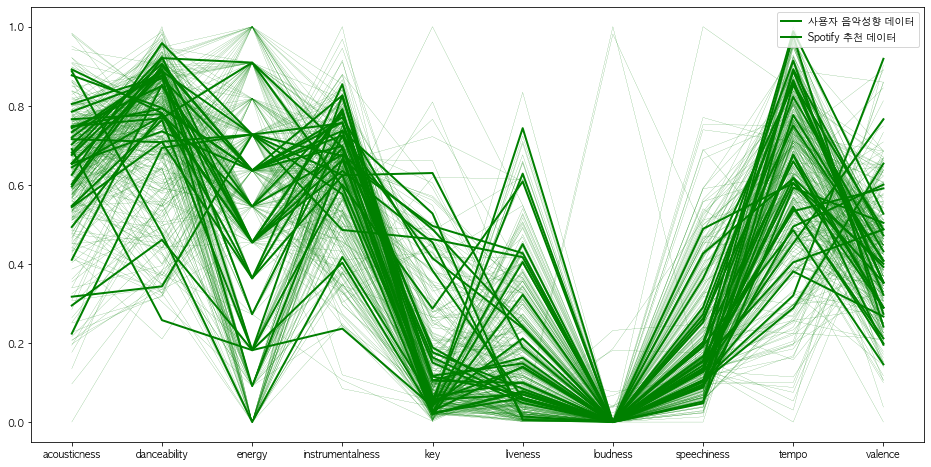

,id,name,artists,artists_name
0,3Vo4wInECJQuz9BIBMOu8i,Finesse - Remix; feat. Cardi B,"0du5cEVh5yTK9QJze8zA0C,4kYSro6naA4h99UJvo89HB","Bruno Mars,Cardi B"
1,22fkACoSaO4drFbiTtxolG,Juliet,3Lz3vEN23Fw0hIelrYEzUD,EXO-CBX
2,7Mn9begcwfZ7utquTWUmjV,Magic,6gzXCdfYfFe5XKhPKkYqxV,SUPER JUNIOR
3,4QeoDcR16IHpmmgFGQDrCp,No Vacancy,5Pwc4xIPtQLFEnJriah9YJ,OneRepublic
4,2igbKtoBMXdYgYPkCpl0V4,Body Moves,6T5tfhQCknKG4UnH90qGnz,DNCE


In [204]:
filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()
reco_musics = [_ in _filtering_music_list for _ in recos['id']]

utils.visual_norm_data(sel_tracks, filter_music)
recos[reco_musics].head()

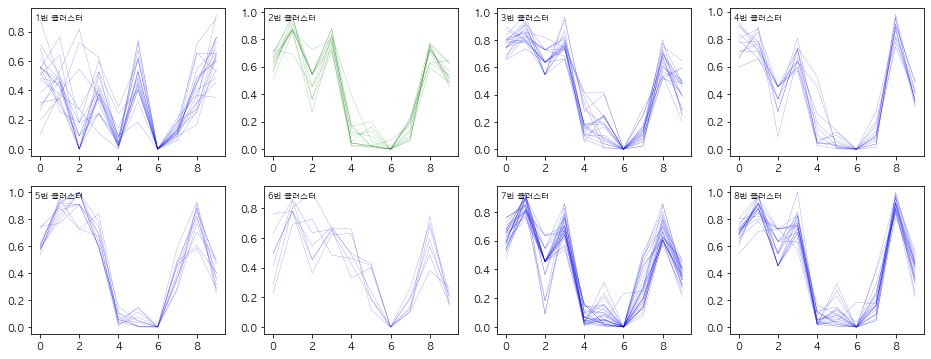

In [205]:
while True:
    kmeans = utils.KMeans(
        datas=filter_music
    )
    kmeans.run(early_stop_cnt=5)
    clear_output(wait=True)


    _filtering_music_list = dp.music_filtering(sel_tracks, kmeans)

    if len(_filtering_music_list) <= (100 + len(sel_tracks)):
        break
    else:
        filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()

utils.visual_cluster_data(sel_tracks, kmeans)

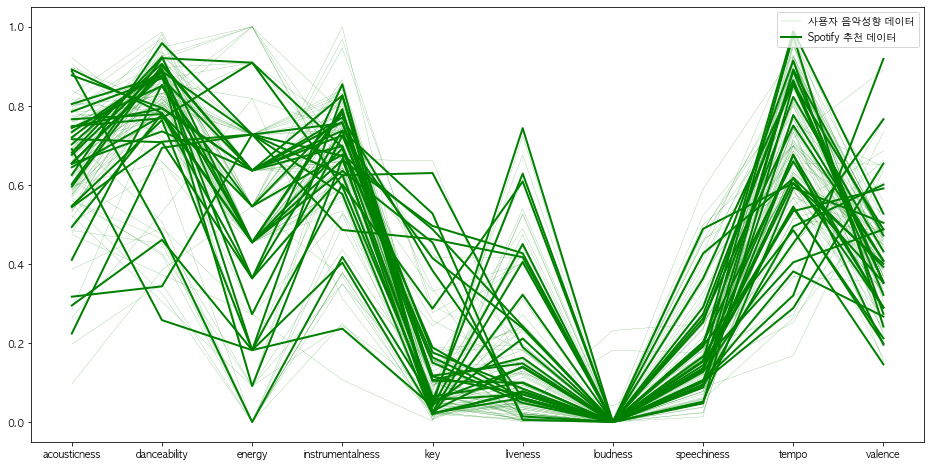

,id,name,artists,artists_name
0,3Vo4wInECJQuz9BIBMOu8i,Finesse - Remix; feat. Cardi B,"0du5cEVh5yTK9QJze8zA0C,4kYSro6naA4h99UJvo89HB","Bruno Mars,Cardi B"
1,22fkACoSaO4drFbiTtxolG,Juliet,3Lz3vEN23Fw0hIelrYEzUD,EXO-CBX
2,7Mn9begcwfZ7utquTWUmjV,Magic,6gzXCdfYfFe5XKhPKkYqxV,SUPER JUNIOR
4,2igbKtoBMXdYgYPkCpl0V4,Body Moves,6T5tfhQCknKG4UnH90qGnz,DNCE
5,6cOwlwa2cPz3yDekr8IXmb,Dress Up,5rGgflnIpRNizTCozbYBuY,JONGHYUN


In [206]:
filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()
reco_musics = [_ in _filtering_music_list for _ in recos['id']]

utils.visual_norm_data(sel_tracks, filter_music)
recos[reco_musics].head()

In [207]:
db.new_mail(mail_box_id,
           recos[reco_musics])

In [208]:
genres

,count
k-pop,2
pop,1


In [209]:
spotify.get_genres(token,recos[reco_musics])

,count
k-pop,37
pop,25
j-idol,3
edm,2
latin,2
house,2
rock,2
reggaeton,1
j-pop,1
j-rock,1
